In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#this is to check if the DATA LOADING is efficient or not
cell_df=pd.read_csv('cell_samples.csv')  
cell_df.tail()  #for last 5 columns use head for first 5 columns
cell_df.shape  #gives number of rows and columns
cell_df.count()  #how many values are given in each col
cell_df['Class'].value_counts()  #class contains if the cell is malignant(4) or benign(2) 

2    458
4    241
Name: Class, dtype: int64

<Axes: xlabel='Clump', ylabel='UnifSize'>

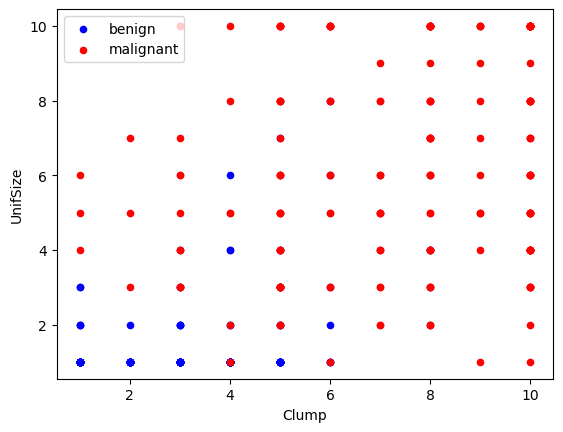

In [13]:
#to check graph
benign_df =cell_df[cell_df['Class']==2][0:200]
malignant_df =cell_df[cell_df['Class']==4][0:200]
axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='malignant',ax=axes)
# use help(benign_df.plot) to know the type of graph you can make eg:line

In [17]:
#identify unwanted columns
cell_df.dtypes      #bareNuc have object , others have int val
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()] #change the values column barenuc into integers
cell_df['BareNuc']= cell_df['BareNuc'].astype('int')
cell_df.dtypes

C:\Users\ipsit\AppData\Local\Temp\ipykernel_18116\2470873517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc']= cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [20]:
#remove unwanted columns
cell_df.columns
feature_df = cell_df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#after removing class and id x is an independant variable
x=np.asarray(feature_df)
#dependant variable
y=np.asarray(cell_df['Class'])
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [22]:
'''
TRAINING AND TESTING DATASET
cell_df-->Train/test
Train(x,y) ##x is 2d and y is 1d
Test(x,y)
'''
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
x_train.shape   #546x9
y_train.shape   #546x1
x_test.shape    #137x9
y_test.shape    #137x1

(137,)

In [25]:
# MODELING(SVM with scikit_learn)
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)                   #gamma is kernel coefficient                   
#SVC is support vector classifier   (it is max sum of the datapoints we calculate on hyperplane)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

